In [107]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from pandas_profiling import ProfileReport
from sklearn import metrics
from xgboost import XGBClassifier

## Load Data

In [108]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [138]:
# binary classification, missing data
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
# load data
dataframe = pd.read_csv('data/train.csv')

dataframe = dataframe.replace('-1', np.nan)
dataframe =dataframe.replace(-1, np.nan)
dataframe =dataframe.replace(-1.0, np.nan)

#dataframe = dataframe.fillna(0)

In [139]:
def objects_to_category(df):
    '''
    function that converts objects to categorical features.
    '''
    object_cols = df.select_dtypes(include='object').columns.tolist()
    object_features = df[object_cols].astype("category")
    for field in object_cols:
        df[field] = object_features[field].cat.codes
    return df

# fill na
dataframe = objects_to_category(dataframe)

In [140]:
dataframe.columns

Index(['id', 'incident_year', 'incident_month', 'incident_day', 'operator_id',
       'operator', 'aircraft', 'aircraft_type', 'aircraft_make',
       'aircraft_model', 'aircraft_mass', 'engine_make', 'engine_model',
       'engines', 'engine_type', 'engine1_position', 'engine2_position',
       'engine3_position', 'engine4_position', 'airport_id', 'airport',
       'state', 'faa_region', 'flight_phase', 'visibility', 'precipitation',
       'height', 'speed', 'distance', 'species_id', 'species_name',
       'species_quantity', 'flight_impact', 'damaged'],
      dtype='object')

In [141]:
features = ['incident_year', 'incident_month', 'incident_day', 'operator_id',
       'operator', 'aircraft', 'aircraft_type', 'aircraft_make',
       'aircraft_model', 'aircraft_mass', 'engine_make', 'engine_model',
       'engines', 'engine_type', 'engine1_position', 'engine2_position',
       'engine3_position', 'engine4_position', 'airport',
       'state', 'faa_region', 'flight_phase', 'visibility', 'precipitation',
       'height', 'speed', 'distance', 'species_name',
       'species_quantity', 'flight_impact']

target = 'damaged'

In [142]:
X = dataframe[features].values
Y = dataframe[target].values

In [143]:
X = X.astype('float32')

In [144]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
X = imputer.fit_transform(X)

In [145]:
X

array([[ 1.996e+03,  1.100e+01,  7.000e+00, ...,  3.800e+02,  0.000e+00,
        -1.000e+00],
       [ 1.999e+03,  6.000e+00,  2.600e+01, ...,  3.800e+02,  0.000e+00,
        -1.000e+00],
       [ 2.011e+03,  1.200e+01,  1.000e+00, ...,  3.980e+02,  0.000e+00,
         3.000e+00],
       ...,
       [ 2.013e+03,  1.000e+01,  1.100e+01, ...,  2.460e+02,  0.000e+00,
        -1.000e+00],
       [ 2.006e+03,  3.000e+00,  7.000e+00, ...,  2.460e+02,  0.000e+00,
         5.000e+00],
       [ 1.995e+03,  6.000e+00,  5.000e+00, ...,  3.800e+02,  0.000e+00,
         3.000e+00]], dtype=float32)

In [146]:
# split data into X and y
# encode Y class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)

In [147]:
# split data into train and test sets
seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, label_encoded_y, test_size=test_size, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [148]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [149]:
model = XGBClassifier(max_depth=4,
                    min_child_weight=1,
                    learning_rate=0.1,
                    n_estimators=1000,
                    silent=True,
                    objective='binary:logistic',
                    gamma=4,
                    max_delta_step=0,
                    subsample=0.88,
                    colsample_bytree=1,
                    colsample_bylevel=1,
                    reg_alpha=0,
                    reg_lambda=0,
                    scale_pos_weight=1,
                    seed=1,
                    missing=None,
                    base_score='.92'
                    )

In [2]:
model = XGBClassifier()

pipeline = Pipeline([
    ('standard_scaler', StandardScaler()), 
    ('model', model)
])

param_grid = {
    'model__max_depth': [2, 3, 5, 7, 10],
    'model__n_estimators': [10, 100, 500],
}

grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='mse')

NameError: name 'XGBClassifier' is not defined

In [156]:
grid.fit(X_train, y_train)

/Users/neilturner/anaconda3/envs/python3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:39:45] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standard_scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constrai

In [160]:
mean_score = grid.cv_results_["mean_test_score"][grid.best_index_]
std_score = grid.cv_results_["std_test_score"][grid.best_index_]

grid.best_params_, mean_score, std_score

print(f"Best parameters: {grid.best_params_}")
print(f"Mean CV score: {mean_score: .6f}")
print(f"Standard deviation of CV score: {std_score: .6f}")

Best parameters: {'model__max_depth': 3, 'model__n_estimators': 100}
Mean CV score: -0.200237
Standard deviation of CV score:  0.006702


In [133]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', model)])

In [134]:
pipe.fit(X_train,
    y_train)

/Users/neilturner/anaconda3/envs/python3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:35:07] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:35:07] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 XGBClassifier(base_score='.92', booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=4, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=4,
                               min_child_weight=1, missing=None,
                               monotone_constraints='()', n_estimators=1000,
                               n_jobs=12, num_parallel_tree=1,
                               objective='binary:logistic', random_state=1,
                               reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
                               seed=1, silent=True, subsample=0.88,
                 

In [135]:
pipe.score(X_test, y_test)

0.9266666666666666

In [119]:
#View notbook for details on  Parameter Tuning
model = XGBClassifier(max_depth=4,
                    min_child_weight=1,
                    learning_rate=0.1,
                    n_estimators=1000,
                    silent=True,
                    objective='binary:logistic',
                    gamma=4,
                    max_delta_step=0,
                    subsample=0.88,
                    colsample_bytree=1,
                    colsample_bylevel=1,
                    reg_alpha=0,
                    reg_lambda=0,
                    scale_pos_weight=1,
                    seed=1,
                    missing=None
                    )

model.fit(
    X_train,
    y_train,
    eval_metric="logloss",
    eval_set=[(X_train, y_train), (X_val, y_val)], 
    verbose=True,
    early_stopping_rounds = 10
)

[16:05:50] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-logloss:0.62163	validation_1-logloss:0.62186
[1]	validation_0-logloss:0.56309	validation_1-logloss:0.56371
[2]	validation_0-logloss:0.51449	validation_1-logloss:0.51534
[3]	validation_0-logloss:0.47370	validation_1-logloss:0.47486
[4]	validation_0-logloss:0.43914	validation_1-logloss:0.44041
[5]	validation_0-logloss:0.40950	validation_1-logloss:0.41087
[6]	validation_0-logloss:0.38405	validation_1-logloss:0.38611
[7]	validation_0-logloss:0.36208	validation_1-logloss:0.36434
[8]	validation_0-logloss:0.34337	validation_1-logloss:0.34593
[9]	val

/Users/neilturner/anaconda3/envs/python3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20]	validation_0-logloss:0.23715	validation_1-logloss:0.24407
[21]	validation_0-logloss:0.23339	validation_1-logloss:0.24039
[22]	validation_0-logloss:0.23034	validation_1-logloss:0.23774
[23]	validation_0-logloss:0.22727	validation_1-logloss:0.23443
[24]	validation_0-logloss:0.22447	validation_1-logloss:0.23220
[25]	validation_0-logloss:0.22193	validation_1-logloss:0.22978
[26]	validation_0-logloss:0.21966	validation_1-logloss:0.22787
[27]	validation_0-logloss:0.21755	validation_1-logloss:0.22594
[28]	validation_0-logloss:0.21583	validation_1-logloss:0.22419
[29]	validation_0-logloss:0.21406	validation_1-logloss:0.22216
[30]	validation_0-logloss:0.21252	validation_1-logloss:0.22085
[31]	validation_0-logloss:0.21110	validation_1-logloss:0.21981
[32]	validation_0-logloss:0.20919	validation_1-logloss:0.21846
[33]	validation_0-logloss:0.20758	validation_1-logloss:0.21715
[34]	validation_0-logloss:0.20626	validation_1-logloss:0.21638
[35]	validation_0-logloss:0.20516	validation_1-logloss:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=1000, n_jobs=12, num_parallel_tree=1,
              objective='binary:logistic', random_state=1, reg_alpha=0,
              reg_lambda=0, scale_pos_weight=1, seed=1, silent=True,
              subsample=0.88, tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

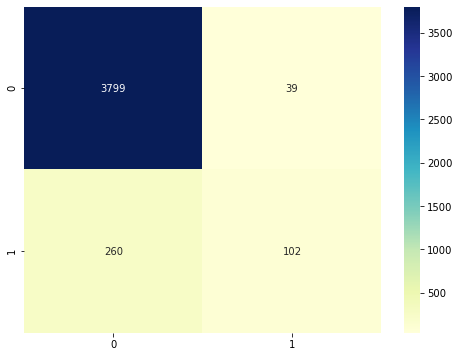

0.20552769277876776
0.9288095238095239
0.8630509387082935
0.057916072621101565
0.4055666003976144
0.281767955801105
0.723404255319149
0.26573690014385914


In [121]:
# riding style null fixed
## Create Report
y_pred = model.predict(X_test)
probs = model.predict_proba(X_test)

results = pd.DataFrame(y_test)
#temp = pd.DataFrame(probs)
results['actual_classification'] = y_test
results['predicted_classification'] = y_pred
results['buy_prob_28'] = probs[:,1]

plt.rcParams["figure.figsize"] = (8, 6)
matrix = metrics.confusion_matrix(results['actual_classification'], results['predicted_classification'])
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.show()
#classification summary stats
print(metrics.log_loss(results['actual_classification'],results['buy_prob_28']))
print(metrics.accuracy_score(results['actual_classification'], results['predicted_classification']))
print(metrics.roc_auc_score(results['actual_classification'],results['buy_prob_28']))
print(metrics.brier_score_loss(results['actual_classification'],results['buy_prob_28']))
print(metrics.f1_score(results['actual_classification'], results['predicted_classification']))
print(metrics.recall_score(results['actual_classification'], results['predicted_classification']))
print(metrics.precision_score(results['actual_classification'], results['predicted_classification']))
print(metrics.average_precision_score(results['actual_classification'], results['predicted_classification']))

In [17]:
dataset

array([['id', 'incident_year', 'incident_month', ..., 'species_quantity',
        'flight_impact', 'damaged'],
       ['23637', '1996', '11', ..., '1', nan, '0'],
       ['8075', '1999', '6', ..., '1', nan, '1'],
       ...,
       [7800, 2013, 10, ..., '1', nan, 0],
       [17294, 2006, 3, ..., '1', 'PRECAUTIONARY LANDING', 0],
       [11145, 1995, 6, ..., '1', 'NONE', 0]], dtype=object)

In [ ]:
# split data into X and y
X = dataset[:,0:27]
Y = dataset[:,27]
# set missing values to 0
X[X == '?'] = 0
# convert to numeric
X = X.astype('float32')
# encode Y class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, label_encoded_y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

## Visualizations

In [422]:
train.shape

(21000, 34)

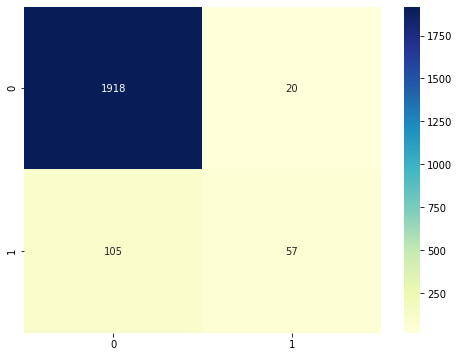

0.1743004724014983
0.9404761904761905
0.888127635719655
0.0481326134341897
0.4769874476987447
0.35185185185185186
0.7402597402597403
0.31046176046176044


In [666]:
# riding style null fixed
## Create Report
y_pred = clf.predict(X_test)
probs = clf.predict_proba(X_test)

results = pd.DataFrame(y_test)
#temp = pd.DataFrame(probs)
results['actual_classification'] = y_test
results['predicted_classification'] = y_pred
results['buy_prob_28'] = probs[:,1]

plt.rcParams["figure.figsize"] = (8, 6)
matrix = metrics.confusion_matrix(results['actual_classification'], results['predicted_classification'])
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.show()
#classification summary stats
print(metrics.log_loss(results['actual_classification'],results['buy_prob_28']))
print(metrics.accuracy_score(results['actual_classification'], results['predicted_classification']))
print(metrics.roc_auc_score(results['actual_classification'],results['buy_prob_28']))
print(metrics.brier_score_loss(results['actual_classification'],results['buy_prob_28']))
print(metrics.f1_score(results['actual_classification'], results['predicted_classification']))
print(metrics.recall_score(results['actual_classification'], results['predicted_classification']))
print(metrics.precision_score(results['actual_classification'], results['predicted_classification']))
print(metrics.average_precision_score(results['actual_classification'], results['predicted_classification']))

In [667]:
## Make Submission
predictions = clf.predict_proba(submission)

In [668]:
pd.DataFrame(predictions)[0]

0       0.350364
1       0.800901
2       0.489206
3       0.803754
4       0.367171
          ...   
8995    0.766724
8996    0.809808
8997    0.560739
8998    0.776147
8999    0.407176
Name: 0, Length: 9000, dtype: float32

In [669]:
test['damaged'] = pd.DataFrame(predictions)[0]

In [670]:
submit = test[['id','damaged']]

In [671]:
submit

,id,damaged
0,11254,0.350364
1,27716,0.800901
2,29066,0.489206
3,3373,0.803754
4,1996,0.367171
...,...,...
8995,14194,0.766724
8996,14451,0.809808
8997,10560,0.560739
8998,23399,0.776147


In [441]:
submit.to_csv('data/submission.csv', index=False)

In [442]:
! kaggle competitions submit -c sliced-s01e02-xunyc5 -f 'data/submission.csv' -m "All features"

100%|█████████████████████████████████████████| 140k/140k [00:00<00:00, 165kB/s]
Successfully submitted to SLICED s01e02

In [ ]:



















sssssssssssssssssssssssssssssssssss



aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa


vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbb

cccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccc
ffffffffffdddccccccccccccc                                                                                                                                                                                                                                                                        dCXVdddddddddddddddddddddddddddddddddddddddddddddcccccccccccccccccccccc                      
vvvvvvvvv

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////





















///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

















v      m       vfghgt3wcrtjhtdqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqx xwwwwwwwwwwwwwwwwwwwwwwwwwwwwwewsxx OKaaazzzxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx






































